<b> To-do </b>
- Hypotheses
- More detailed methodology
- Check over comments?
- Limitations and next steps
- Citations (see last slide of ppt + cite datasets)
- Individual Action (Xinyu)
- Impact of Policies
- Green bar graph (Marco's) -> comment significance


<h1 align="center"> Analyzing Solar Panel Deployment from a Climate Equity and Efficiency Perspective </h1> 
<center> Catherine Quaintance, Hannah Reyes, Marco Tortolani, Emily Wang, Xinyu Wu </center>
<center> <i> Northeastern University, Boston, MA, USA </i> </center>

<h2> <center> Introduction </center> </h2>
<br>
With renewable energy being at the forefront of potential progress for the United States, Google established Google Project Sunroof, a program that encourages data analysis of solar panel costs and efficiency in the US. Google Project Sunroof also took it upon themselves to create an extensive dataset of variables related to solar panel deployment. As a group, we hope to analyze and visualize this dataset to better understand where solar panel deployment would be viable in the US. By combining this data with other datasets of US demographics, we hope to find trends of overlap between where solar panels are viable, which ethnicities find themselves able to deploy them, what income sectors would benefit most from them, etc. Through this overlap, we can have a better understanding of who and where would benefit from the prospect of solar panels in the US.

<h3> <center> Background & Significance </center> </h3>
In this project, we chose to look at solar energy because it's a renewable energy source that homeowners and households actually have the power to install and use. However, as of 2019, only 6% of homes use solar power. Thus, we would like to better understand why this number is so low, how we can increase solar panel deployment, and general accessibility of solar power. When examining these questions, we felt that taking an efficiency and environmental justice/equity perspective would be most reasonable. With the former, we explore efficiency by looking at solar panel deployment numbers in relation ot carbon offset, and also yearly sunlight. This will allow us to understand which geographic regions are most suitable for solar panels and which areas are lacking in their solar panel deployment. In taking a climate equity perspective, we can better understand the disparities in accessibility based off of socioeconomic measures including unemployment, poverty, and income. Generally, we define climate equity as the idea that climate change poses the greatest threats to those that are least responsible. Through our visualizations, we hope to identify which populations have the hardest time deploying solar energy. This is impactful considering that solar panels have high installation prices but can significantly reduce per-household spending on electricity in the long-run. As of 2017, studies suggest that lower-income US households spend 8% of their income on electricity in comparison to 2.9% of income for the average household.

Our research has use cases primarily for policy-making. Following our research analysis, we also provide policy suggestions for the local, state, and federal government levels that we believe would be effective in alleviating the disparity between lower socioeconomic status and higher socioeconomic status households' solar panel deployment. 
<br>


<h3> <center> Research Questions </center> </h3>

1. How does solar panel usage and solar panel/energy efficiency vary by geographic location?
- Are geographic ares with higher yearly sunlight (measured in kilowatts) correlated with more solar panel installations?
- Is there a relationship between carbon offset, yearly sunlight, and installation count?
    
2. In what ways are solar panel deployment correlated with socioeconomic measures (income, poverty, unemployment, etc.)?
- Have poverty, unemployment, and income levels affected solar deployment levels?
- If not, how can we determine feasibility for solar panel deployment in states that currently lack solar?

<h3> <center> Hypotheses </center> <h3>
    
<br>

<h2> <center> Data Sources & Methods </center> </h2>

<i> Solar Panel Deployment + Effiency </i>

https://www.kaggle.com/jboysen/google-project-sunroof?select=sunroof_solar_potential_by_censustract.csv

1. Google Project Sunroof (2017) 
- Existing installation count
- Percent qualified
- Count qualified
- Yearly sunlight
- Carbon offset metric

<i> Socioeconomic Breakdown </i>

https://www.kaggle.com/muonneutrino/us-census-demographic-data?select=acs2015_census_tract_data.csv

2. US Energy, Census, and GDP (2017)
- Income
- Unemployment 
- Poverty

<i> General Methodology: </i>
1. Clean, merge, and group datasets
2. Convert to geodataframes (geometry: polygon, point)
3. Create single and multi-layered visualizations
4. Plot regression correlations

In [11]:
# Import modules 

import csv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import seaborn as sns
%matplotlib inline

# Data Cleaning

The following functions involve importing and managing the two main types of data: solar panel data and US census data. Since this census data comes organized by tract or county, we implemented multiple functions to join these datasets together, and later grouped them by state for more general and intuitive visualizations. Many of the following columns are creating subdivisions of the dataset and extracting key features to implement in our visualizations.

In [9]:
# function to import data 

def to_df(filename):
    """
    Convert csv to dataframe, dropping rows with NaN
    input: csv
    output: df
    """
    df = pd.read_csv(filename)
    df.dropna(inplace=True)
    return df

# function to append census tract data to solar data on solar column region_name
def tract_join(sunroof_df, tract_df):
    '''
    Join df2 first column to df1.region_name:
    input: df, df
    output: df
    '''
    df_new = pd.merge(sunroof_df, tract_df.rename(columns={tract_df.columns[0]:"region_name"}), how='inner', on=["region_name"])
    return df_new

# functions to append census state data to solar data on solar column state_name
def state_join(sunroof_df, tract_df):
    '''
    Join df2 second column to df1.state_name:
    input: df, df
    output: df
    '''
    df_new = pd.merge(sunroof_df, tract_df.rename(columns={tract_df.columns[1]:"state_name"}), how='inner', on=["state_name"])
    return df_new

In [6]:
#organizing datasets to subsets by 

# the main census and sunroof datasets
census2017_df = to_df('acs2017_census_tract_data.csv')
sunroof_origional_df = to_df("sunroof_solar_potential_by_censustract.csv")

# subportions of those datasets by attributes
census2017_demography_df = census2017_df[["TractId", "State", "County", "TotalPop", "Men", "Women", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
census2017_income_df = census2017_df[["TractId", "State", "County", "TotalPop", "Income", "IncomeErr", "IncomePerCap", "IncomePerCapErr", "Poverty", "Employed", "Unemployment"]]


sunroof_total_df = sunroof_origional_df[["region_name", "state_name", "yearly_sunlight_kwh_total", "carbon_offset_metric_tons"]]
sunroof_avg_df = sunroof_origional_df[["region_name", "state_name", "yearly_sunlight_kwh_kw_threshold_avg", "yearly_sunlight_kwh_median"]]

# solar panel installation count data and coodrinate dataframe
sunroof_coverage_df = sunroof_origional_df[["region_name","state_name", "lat_avg", "lng_avg", "count_qualified","existing_installs_count", "percent_qualified", "kw_median", "carbon_offset_metric_tons"]]


# combine census ethnicity data and solar data (unused)
census2017_total_df = tract_join(sunroof_total_df, census2017_demography_df)

#census data by county instead of tract
county_census_2017_df = to_df('acs2017_county_data.csv')

In [4]:
#create Weighted_Average column for census2017_income_df that shows total income by county
def weighted_average(income, total):
    '''
    Multiplies column values
    in: df.column, df.column
    out: df.column
    '''
    return income*total

census2017_income_df['Weighted_Avg'] = weighted_average(census2017_income_df['Income'], census2017_income_df['TotalPop'])

census2017_income_df

<ipython-input-4-d0d04232a859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2017_income_df['Weighted_Avg'] = weighted_average(census2017_income_df['Income'], census2017_income_df['TotalPop'])


,TractId,State,County,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,Weighted_Avg
0,1001020100,Alabama,Autauga County,1845,67826.0,14560.0,33018.0,6294.0,10.7,881,4.6,125138970.0
1,1001020200,Alabama,Autauga County,2172,41287.0,3819.0,18996.0,2453.0,22.4,852,3.4,89675364.0
2,1001020300,Alabama,Autauga County,3385,46806.0,9496.0,21236.0,2562.0,14.7,1482,4.7,158438310.0
3,1001020400,Alabama,Autauga County,4267,55895.0,4369.0,28068.0,3190.0,2.3,1849,6.1,238503965.0
4,1001020500,Alabama,Autauga County,9965,68143.0,14424.0,36905.0,10706.0,12.2,4787,2.3,679044995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,20522.0,2879.0,8643.0,1218.0,39.4,1576,20.8,123357742.0
73997,72153750502,Puerto Rico,Yauco Municipio,2342,24605.0,6027.0,11109.0,1829.0,35.5,666,26.3,57624910.0
73998,72153750503,Puerto Rico,Yauco Municipio,2218,18225.0,4913.0,9603.0,2162.0,52.8,560,23.0,40423050.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,18688.0,4501.0,8331.0,1280.0,50.1,1062,29.5,81853440.0


In [27]:
''' Creates GeoDataframe to associate geographic location (by census tract) with solar panel dataframe using geopandas '''
geo_df = gpd.GeoDataFrame(sunroof_coverage_df, crs = {'init': 'epsg:4326'}, geometry=gpd.points_from_xy(sunroof_coverage_df.lng_avg, sunroof_coverage_df.lat_avg))
geo_df.head()


/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,region_name,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,geometry
0,6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,POINT (-118.43272 34.26704)
1,36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,POINT (-77.60704 43.15637)
2,17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,POINT (-89.06659 42.27779)
3,42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,POINT (-79.99373 40.42296)
4,6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,POINT (-117.93311 33.84404)


In [28]:
''' Creates GeoDataframe to associate states with its geographic shape '''
states = gpd.read_file('usa-states-census-2014.shp') # uses geopandas to read shape file of U.S. map with defined states

# sets index to capitalized state name
states = states.sort_values("NAME").reset_index()
states["NAME"] = states["NAME"].str.upper()

# drops unnecessary entries and columns
states = states.drop_duplicates("NAME")
states = states.rename(columns={'NAME':'STATE'})
states = states.drop(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER', 'region'], axis=1)
states.index = states['STATE']
states.head(10)

,index,STUSPS,STATE,geometry
STATE,,,,
ALABAMA,41,AL,ALABAMA,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46..."
ARIZONA,19,AZ,ARIZONA,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
ARKANSAS,20,AR,ARKANSAS,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36..."
CALIFORNIA,0,CA,CALIFORNIA,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
COLORADO,21,CO,COLORADO,"POLYGON Z ((-109.05996 38.49999 0.00000, -109...."
CONNECTICUT,50,CT,CONNECTICUT,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48..."
DELAWARE,39,DE,DELAWARE,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75..."
DISTRICT OF COLUMBIA,1,DC,DISTRICT OF COLUMBIA,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
FLORIDA,2,FL,FLORIDA,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."


In [29]:
''' Cleans state census dataframe (by grouping states together and dropping non-contiguous states/territories)'''
states_census = census2017_income_df.groupby(['State']).mean()
states_census = states_census.drop(['Alaska', 'Hawaii', 'Puerto Rico'])
states_census.index = states_census.index.str.upper()
states_gdf = pd.concat([states_census, states], axis=1)
states_gdf.head(10)

,TractId,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,index,STUSPS,STATE,geometry
ALABAMA,1.076254e+09,4128.473146,45955.352941,8251.290708,24438.617221,3726.107417,20.425149,1751.151748,8.625320,41,AL,ALABAMA,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46..."
ARIZONA,4.015053e+09,4520.131402,57943.061321,9191.499326,28416.216307,4075.860512,17.668868,1982.518868,7.606536,19,AZ,ARIZONA,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
ARKANSAS,5.078771e+09,4357.301611,44245.267936,7601.938507,23675.897511,3604.329429,19.600878,1868.910688,7.060322,20,AR,ARKANSAS,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36..."
CALIFORNIA,6.054945e+09,4888.229450,73126.602496,12121.199950,34003.005169,4790.453101,15.372516,2264.605144,7.858724,0,CA,CALIFORNIA,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
COLORADO,8.046904e+09,4396.352033,69643.886179,9990.802439,34873.768293,4664.382114,12.175854,2240.550407,5.493740,21,CO,COLORADO,"POLYGON Z ((-109.05996 38.49999 0.00000, -109...."
CONNECTICUT,9.005898e+09,4356.646192,79622.418919,13054.175676,40258.988943,5453.981572,11.253686,2198.288698,7.814496,50,CT,CONNECTICUT,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48..."
DELAWARE,1.000322e+10,4420.666667,64532.525822,9495.586854,33873.802817,4911.154930,12.969484,2069.117371,6.575587,39,DE,DELAWARE,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75..."
DISTRICT OF COLUMBIA,1.100101e+10,3762.420455,83202.653409,15356.380682,50080.386364,7440.352273,18.050568,2010.556818,9.853409,1,DC,DISTRICT OF COLUMBIA,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
FLORIDA,1.207169e+10,4892.864806,54284.379612,9409.208495,30189.667476,4790.063107,16.049175,2183.811893,7.427306,2,FL,FLORIDA,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
GEORGIA,1.313283e+10,5223.962564,54680.631282,9171.294359,27395.109231,4085.183077,19.159949,2361.175385,8.186821,3,GA,GEORGIA,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."


In [30]:
''' Combines state-level census, income, and solar efficiency into a geodataframe '''
states_solar = census2017_total_df.groupby(['state_name']).mean()
states_solar.index = states_solar.index.str.upper()
states_combined_gdf = pd.concat([states_solar, states_gdf], axis=1, join='inner')
states_combined_gdf = gpd.GeoDataFrame(states_combined_gdf, crs = {'init':'epsg:4326'})
states_combined_gdf['yearly_sunlight_scale'] = states_combined_gdf['yearly_sunlight_kwh_total'] / (10**6) # scales sunlight totals?
states_combined_gdf.head(10)


/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-30-06f31d1c1425>:5: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  states_combined_gdf = gpd.GeoDataFrame(states_combined_gdf, crs = {'init':'epsg:4326'})


,region_name,yearly_sunlight_kwh_total,carbon_offset_metric_tons,TotalPop,Men,Women,Hispanic,White,Black,Native,...,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,index,STUSPS,STATE,geometry,yearly_sunlight_scale
ALABAMA,1.082247e+09,2.541389e+07,16118.536028,4299.028264,2065.943472,2233.084791,4.516151,55.899192,35.912921,0.303634,...,24438.617221,3726.107417,20.425149,1751.151748,8.625320,41,AL,ALABAMA,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46...",25.413891
ARIZONA,4.015143e+09,3.677873e+07,15784.798371,4552.916667,2249.442244,2303.474422,31.448927,56.337294,4.271782,1.977310,...,28416.216307,4075.860512,17.668868,1982.518868,7.606536,19,AZ,ARIZONA,"POLYGON Z ((-114.79968 32.59362 0.00000, -114....",36.778725
ARKANSAS,5.093486e+09,2.904654e+07,18254.316548,4977.564935,2433.220779,2544.344156,8.932143,64.059091,21.622727,0.498052,...,23675.897511,3604.329429,19.600878,1868.910688,7.060322,20,AR,ARKANSAS,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36...",29.046537
CALIFORNIA,6.055421e+09,2.702117e+07,7434.584054,4920.660581,2434.651729,2486.008852,38.021521,38.085574,5.748354,0.291674,...,34003.005169,4790.453101,15.372516,2264.605144,7.858724,0,CA,CALIFORNIA,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",27.021169
COLORADO,8.041555e+09,2.086319e+07,12703.256689,4557.685225,2274.786938,2282.898287,22.036188,66.988758,4.280728,0.496895,...,34873.768293,4664.382114,12.175854,2240.550407,5.493740,21,CO,COLORADO,"POLYGON Z ((-109.05996 38.49999 0.00000, -109....",20.863189
CONNECTICUT,9.005737e+09,1.356023e+07,5871.249050,4373.169725,2122.139144,2251.030581,18.230734,62.198165,12.433333,0.145566,...,40258.988943,5453.981572,11.253686,2198.288698,7.814496,50,CT,CONNECTICUT,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48...",13.560227
DELAWARE,1.000230e+10,1.734049e+07,11019.196225,5251.942857,2525.657143,2726.285714,7.217143,63.800000,23.080000,0.431429,...,33873.802817,4911.154930,12.969484,2069.117371,6.575587,39,DE,DELAWARE,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75...",17.340486
DISTRICT OF COLUMBIA,1.100101e+10,5.608190e+06,3563.783737,3816.317365,1810.556886,2005.760479,10.121557,32.037126,51.985030,0.153892,...,50080.386364,7440.352273,18.050568,2010.556818,9.853409,1,DC,DISTRICT OF COLUMBIA,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",5.608190
FLORIDA,1.207077e+10,3.418984e+07,18356.465378,4855.108410,2363.263798,2491.844612,21.076051,58.797503,15.278417,0.215276,...,30189.667476,4790.063107,16.049175,2183.811893,7.427306,2,FL,FLORIDA,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",34.189842
GEORGIA,1.311830e+10,2.595962e+07,15524.166743,5574.748998,2694.436247,2880.312751,10.233440,45.722614,36.915878,0.180433,...,27395.109231,4085.183077,19.159949,2361.175385,8.186821,3,GA,GEORGIA,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",25.959617


In [31]:
''' Drops Hawaii and Alaska from solar panel GeoDataframe ''' 
solar_gdf = geo_df
solar_gdf.index = solar_gdf['state_name'].str.upper()
solar_gdf = solar_gdf.drop(['HAWAII', 'ALASKA'])
solar_gdf['existing_scale'] = solar_gdf['existing_installs_count'] * 2
solar_gdf['percent_install'] = (solar_gdf['existing_installs_count'] / solar_gdf['count_qualified']) * 1000
# scales down carbon offset to prevent dot size from being too large
solar_gdf['carbon_scale'] = solar_gdf['carbon_offset_metric_tons'] / 500 
solar_gdf

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,region_name,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,geometry,existing_scale,percent_install,carbon_scale
state_name,,,,,,,,,,,,,
CALIFORNIA,6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,POINT (-118.43272 34.26704),24,20.477816,4.319775
NEW YORK,36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,POINT (-77.60704 43.15637),8,10.840108,22.784632
ILLINOIS,17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,POINT (-89.06659 42.27779),6,3.807107,13.804572
PENNSYLVANIA,42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,POINT (-79.99373 40.42296),2,2.314815,6.477867
CALIFORNIA,6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,POINT (-117.93311 33.84404),64,38.694075,12.223747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEXAS,48121020113,Texas,33.176277,-96.911400,1930,14,84.426947,7.50,10684.715336,POINT (-96.91140 33.17628),28,7.253886,21.369431
NEW JERSEY,34027042302,New Jersey,40.838047,-74.476219,491,5,45.887850,6.25,13640.429234,POINT (-74.47622 40.83805),10,10.183299,27.280858
CALIFORNIA,6037543322,California,33.852547,-118.256958,2098,18,96.548550,8.75,8901.367807,POINT (-118.25696 33.85255),36,8.579600,17.802736


# Unemployment Bar Graphs

Before we move into specific maps of solar deployment accross the US, it is important to get a sense of which states are struggling most economically. As our project gives suggestions for policy changes, it is important to have a sense on whether it's the states with a strong economic development that have high solar panel deployment.

Text(0.5, 1.0, '# Unemployed vs. State')

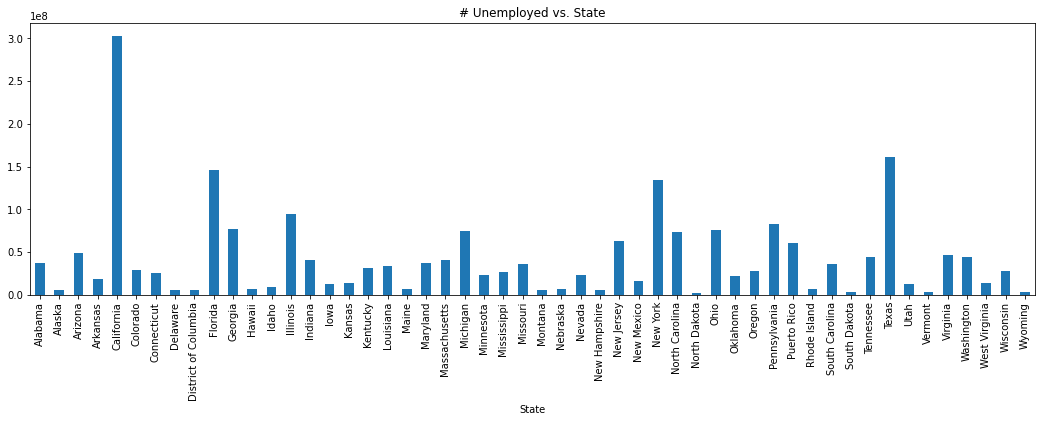

In [13]:
# Creates a unique list of eache state
states = county_census_2017_df['State']
unique_states = []
states_list = [unique_states.append(state) for state in states if state not in unique_states]

''' Computes the number of unemployed individuals in state using %age unemployed '''
#creates a function to help find total amount of peopole unemployed
def multiply(x,y):
    '''
    Multiplies two python values (in this case dataframe columns)
    in: df.column, df.column
    out: df.column
    '''
    return round(x*y)

county_census_2017_df['# Unemployed'] = multiply(county_census_2017_df['TotalPop'],county_census_2017_df['Unemployment'])

# Want to sum up by state, in order to determine metrics and visualize
state_vs_unemployed = county_census_2017_df.groupby(["State"])["# Unemployed"].agg('sum')


# Plot states by unemployment rates
state_vs_unemployed.plot.bar(figsize=(18,5))
plt.title('# Unemployed vs. State')
#plt.xticks(unique_states)

# Installation Bar Graphs

The bar graphs below display the current solar panel installation count by state in green, and then later overlays the potential solar panel installation count in red. The graphs serve two purposes: 1. To allow viewers to have a general idea of what key states have done or need to do the most work in solar panel deployment. As many of our later visualizations are maps of the US, indicating which important states to look at are valuable. 2. To emphasize the amount of work there is left to do in solar panel deployment, where even the most "green" states are even a tenth of the way to optimal development. 

C:\Users\mtort\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Current Installation')

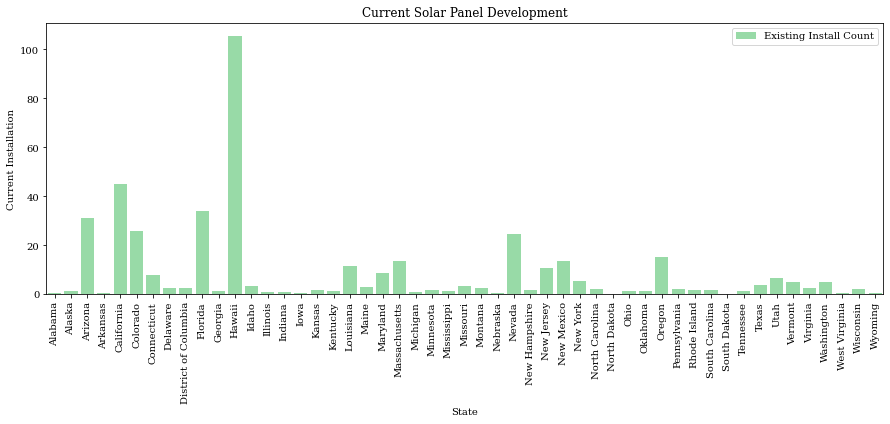

In [13]:
#create temporary mean solar installation dataframe by state
census2017_total_df = tract_join(sunroof_coverage_df, census2017_demography_df)
state_means = census2017_total_df.groupby("state_name").mean()

#utilize seaborn to plot current installations by state
plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")
plt.rcParams['font.family'] = "serif"
sns.barplot(state_means.index, state_means.existing_installs_count, label="Existing Install Count", color= 'g')
plt.legend()
plt.xticks(rotation=90)
plt.title('Current Solar Panel Development')
plt.xlabel("State")
plt.ylabel("Current Installation")

C:\Users\mtort\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mtort\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Current vs. Potential Installation')

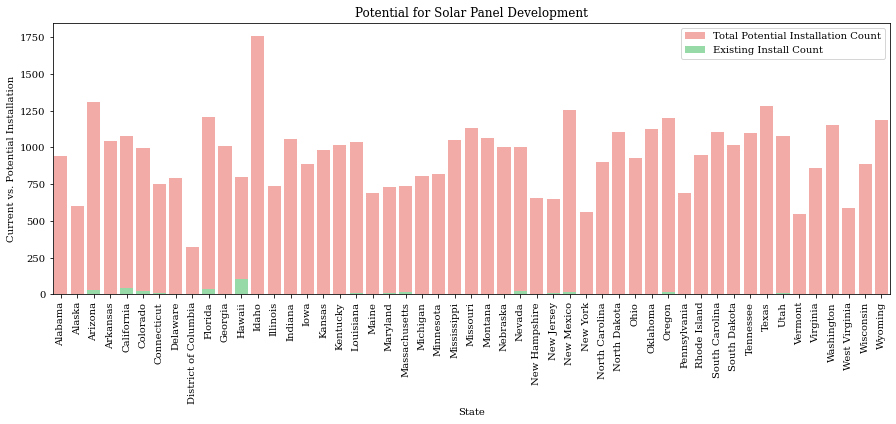

In [15]:
#utilize seaborn to overlay potential solar installations over current solar installations
plt.rcParams['font.family'] = "serif"
plt.figure(figsize=(15,5))

sns.set_color_codes("pastel")
sns.barplot(state_means.index, state_means.count_qualified,
            label="Total Potential Installation Count", color="r")
sns.barplot(state_means.index, state_means.existing_installs_count, label="Existing Install Count", color= 'g')
plt.legend()
plt.xticks(rotation=90)
plt.title("Potential for Solar Panel Development")
plt.xlabel("State")
plt.ylabel("Current vs. Potential Installation")


# Poverty vs. Unemployment

We previously saw which states have high unemployment levels, yet to round out our understanding of the effect of socioeconomic correlations, we included a visualization which compares unemployment and poverty in key regions of the US.

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']


Text(0.5, 1.0, 'Poverty vs. Unemployment (US)')

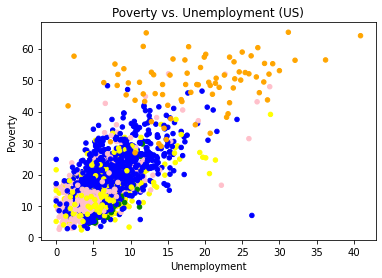

In [15]:
''' Generates scatterplot comparing poverty and unemployment levels in various regions '''
states = county_census_2017_df['State']
unique_states = []
states_list = [unique_states.append(state) for state in states if state not in unique_states]
print(unique_states)

# COLOR CODE:
    # Northeast - green
    # Midwest - pink
    # South - blue
    # West - yellow
    # Puerto Rico - orange
colors = {'Alabama':'blue','Alaska':'yellow','Arizona':'yellow', 'Arkansas': 'blue', 'California': 'yellow', 
         'Colorado': 'yellow', 'Connecticut': 'green', 'Delaware': 'blue', 'District of Columbia': 'blue',
         'Florida': 'blue', 'Georgia': 'blue', 'Hawaii': 'yellow', 'Idaho': 'yellow', 'Illinois': 'pink',
         'Indiana': 'pink', 'Iowa': 'pink', 'Kansas': 'pink', 'Kentucky': 'blue', 'Louisiana': 'blue',
         'Maine': 'green', 'Maryland': 'blue', 'Massachusetts': 'green', 'Michigan': 'pink', 'Minnesota': 'pink',
         'Mississippi': 'blue', 'Missouri': 'pink', 'Montana': 'yellow', 'Nebraska': 'pink', 'Nevada': 'yellow',
         'New Hampshire': 'green', 'New Jersey': 'green', 'New Mexico': 'yellow', 'New York': 'green',
         'North Carolina': 'blue', 'North Dakota': 'pink', 'Ohio': 'pink', 'Oklahoma': 'blue', 'Oregon': 'yellow',
         'Pennsylvania': 'green', 'Rhode Island': 'green', 'South Carolina': 'blue', 'South Dakota': 'pink', 
          'Tennessee': 'blue','Texas': 'blue', 'Utah': 'yellow', 'Vermont': 'green', 'Virginia': 'blue', 
          'Washington': 'yellow', 'West Virginia': 'blue', 'Wisconsin': 'pink', 
          'Wyoming': 'yellow', 'Puerto Rico': 'orange'}
county_census_2017_df['color'] = county_census_2017_df['State'].apply(lambda x: colors[x])


county_census_2017_df.plot.scatter(x='Unemployment', y='Poverty', c='color', colormap='viridis')
plt.title('Poverty vs. Unemployment (US)')

Text(0.5, 1.0, 'Poverty')

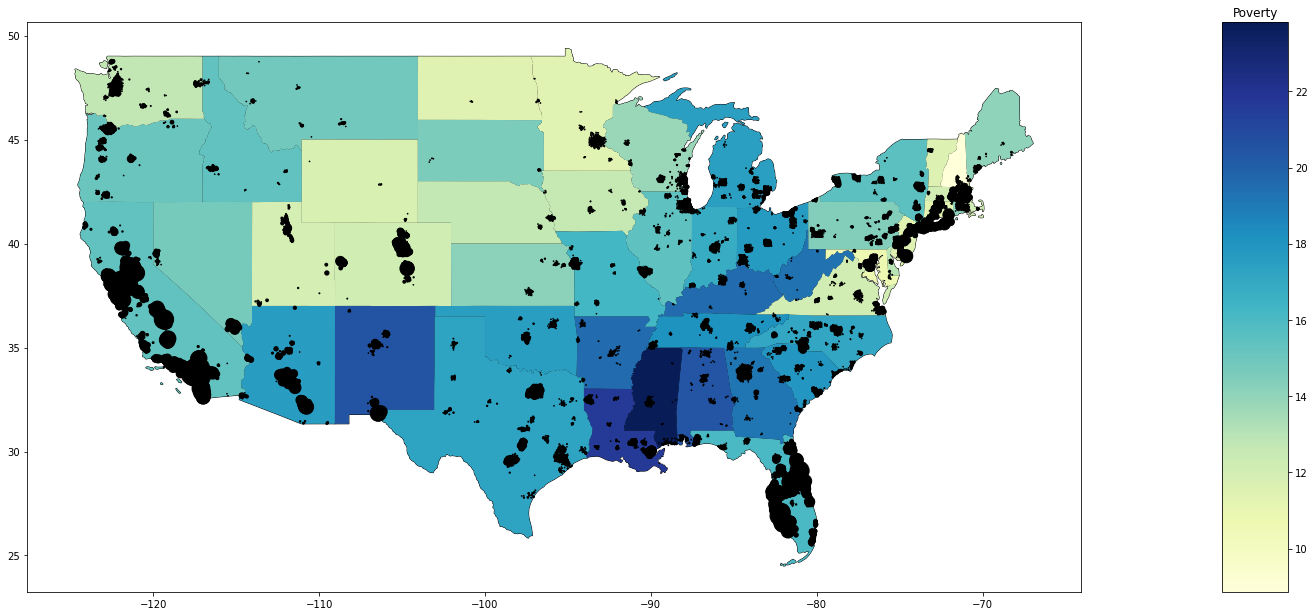

In [10]:
''' Creates map visualization depicting relationship between existing installation count and poverty in the U.S. '''
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='Poverty', marker = '.', cmap='YlGnBu', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Poverty')



Text(0.5, 1.0, 'Yearly Sunlight')

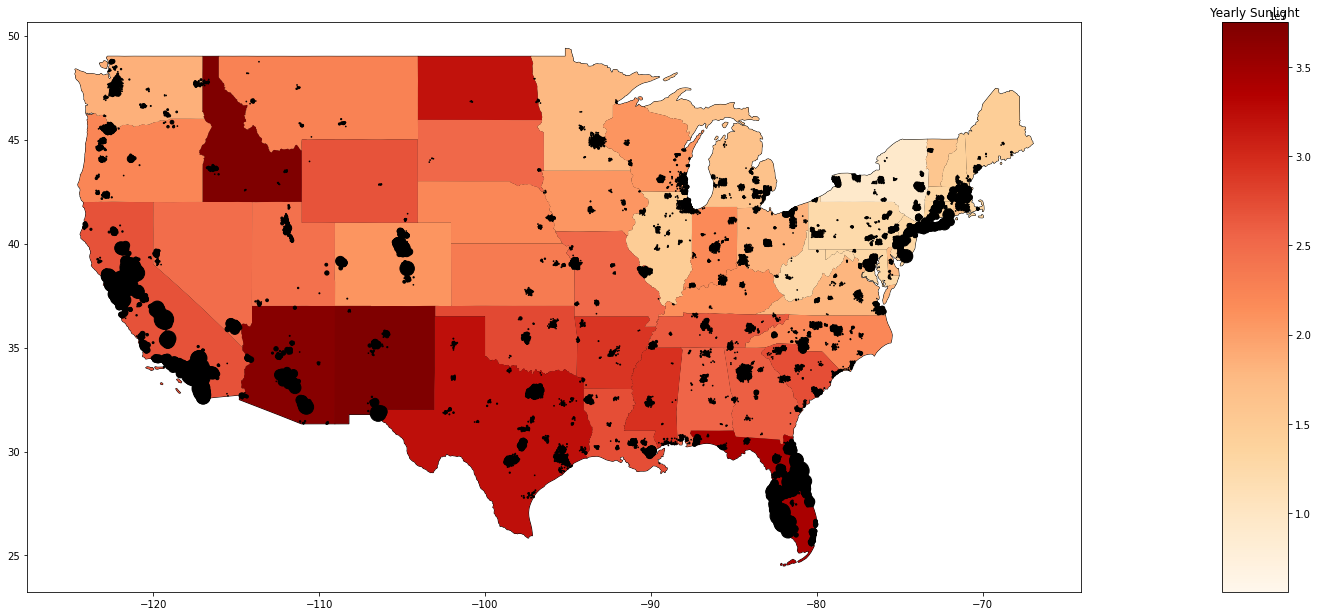

In [11]:
''' Creates map visualization depicting relationship between existing installation count and yearly sunlight in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='yearly_sunlight_kwh_total', marker = '.', cmap='OrRd', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Yearly Sunlight')

Text(0.5, 1.0, 'Income Per Capita')

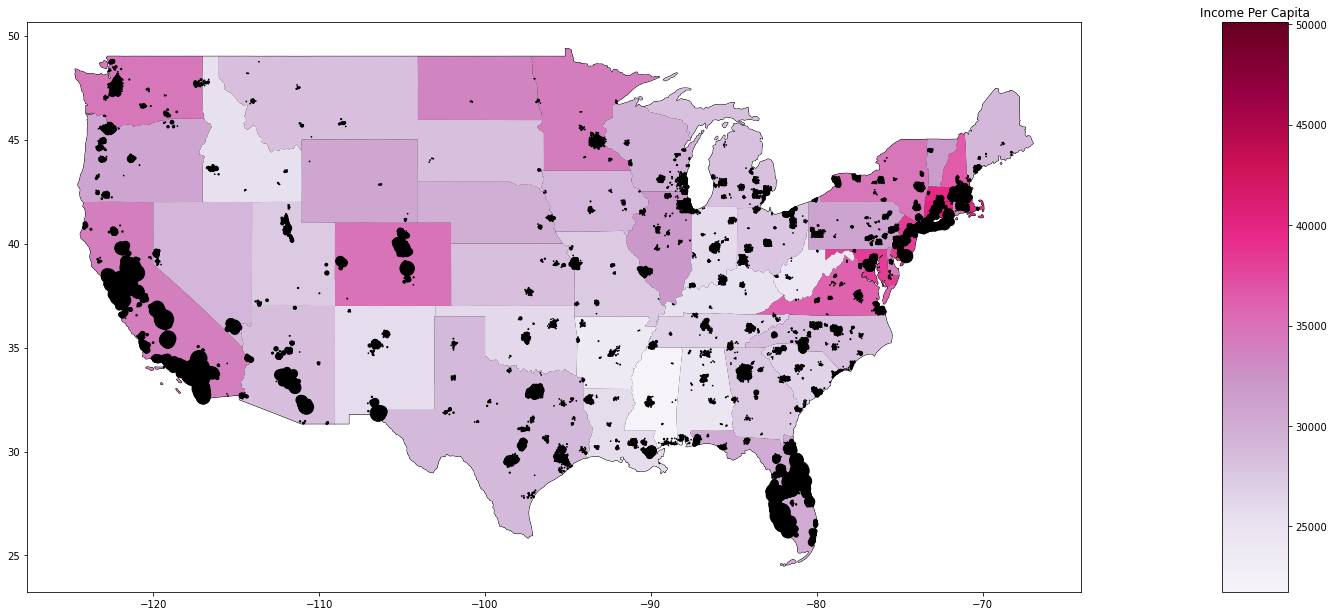

In [12]:
''' Creates map visualization depicting relationship between existing installation count and income per capita in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='IncomePerCap', marker = '.', cmap='PuRd', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Income Per Capita')

Text(0.5, 1.0, 'White(%)')

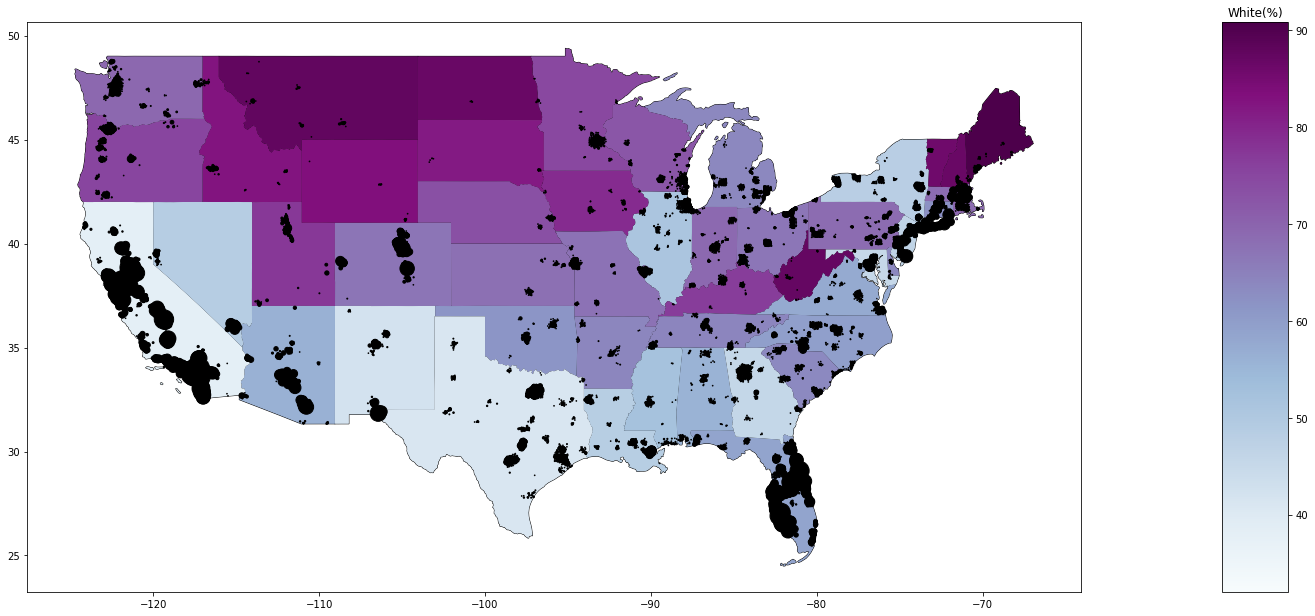

In [14]:
''' Creates map visualization depicting relationship between existing installation count and the percentage of the white population in the U.S. '''
# DID WE USE THIS AND SHLD WE GET RID OF THIS
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='White', marker = '.', cmap='BuPu', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('White(%)')

Text(0.5, 1.0, 'Income Per Capita')

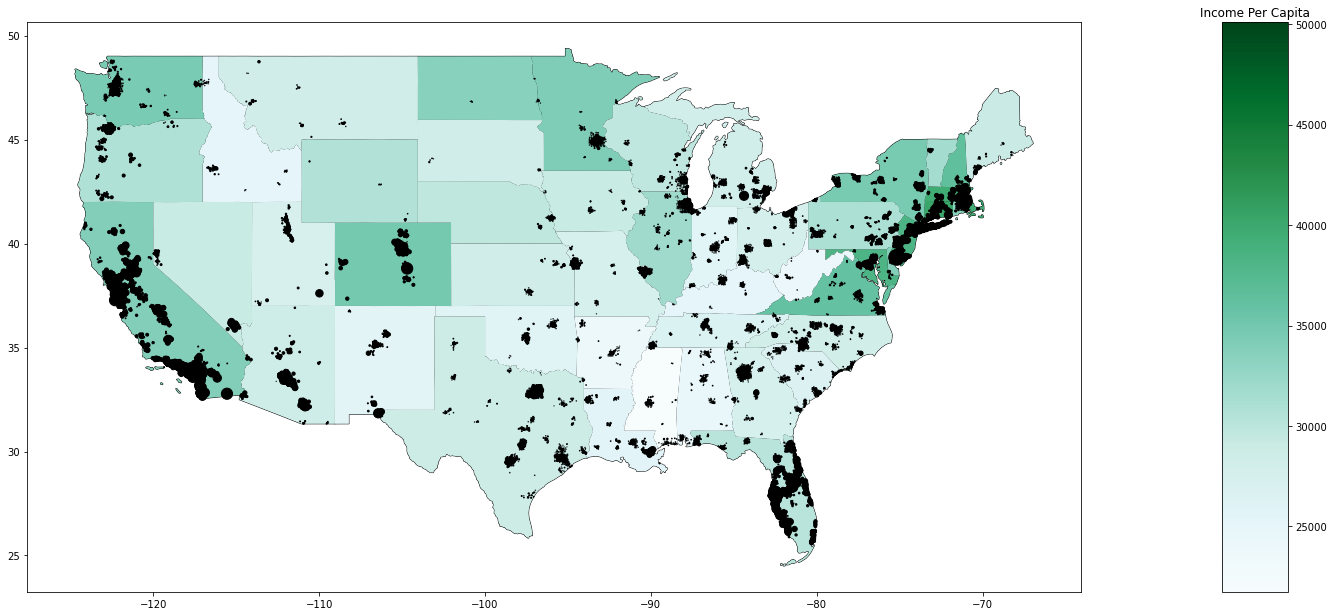

In [15]:
''' Creates map visualization depicting relationship between percentage of installations and income per capita in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='IncomePerCap', marker = '.', cmap='BuGn', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='percent_install')
plt.title('Income Per Capita')

Text(0.5, 1.0, 'Unemployment(%)')

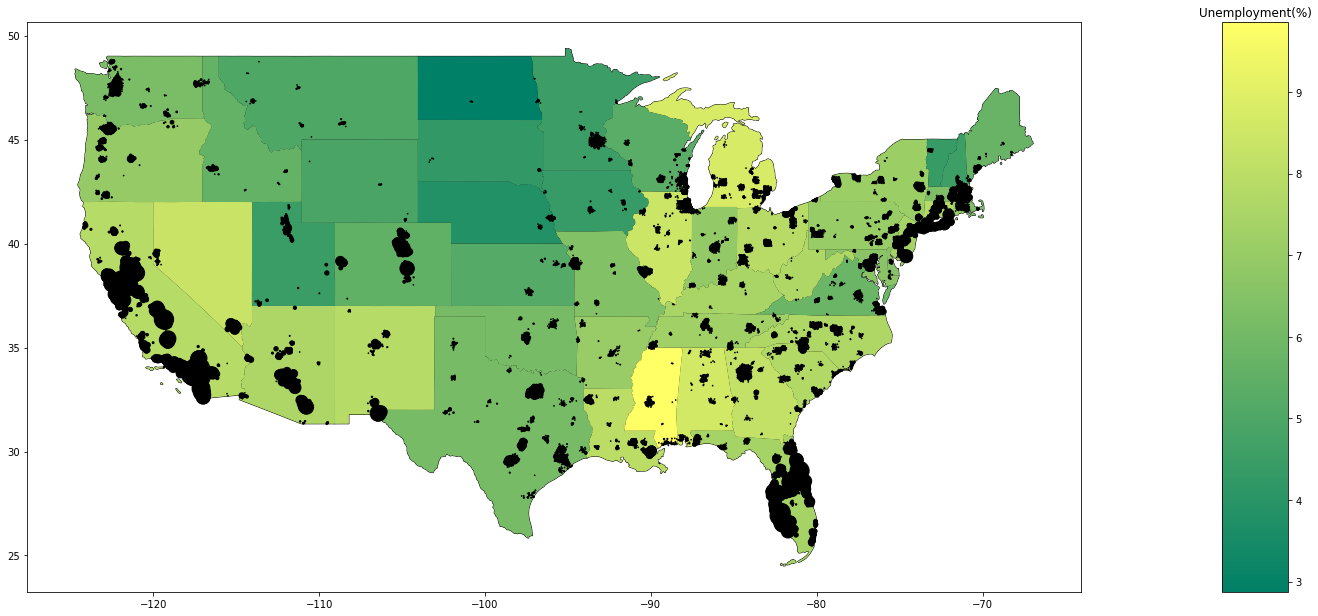

In [16]:
''' Creates map visualization depicting relationship between carbon offset and unemployment in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='Unemployment', marker = '.', cmap='summer', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Unemployment(%)')

Text(0.5, 1.0, 'Yearly Sunlight (Median kw)')

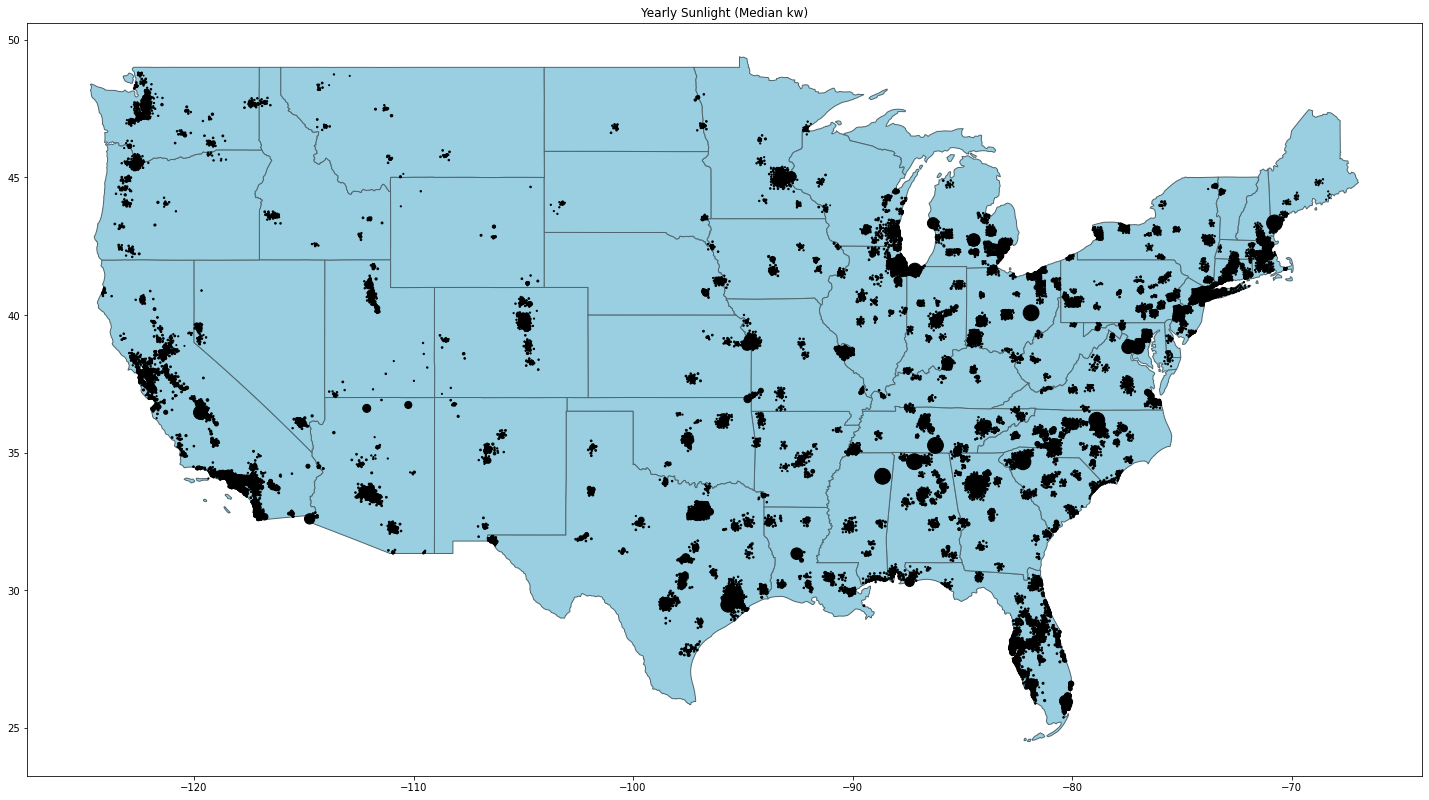

In [17]:
''' Creates map visualization depicting relationship between yearly sunlight and solar panel installations in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))
base = states_combined_gdf.plot(ax=ax, color='#99cfe0', edgecolor='#50666e')

solar_gdf.plot(ax=base, marker = '.', color='black', markersize='kw_median')

plt.title('Yearly Sunlight (Median kw)')

# Installation Scatterplots

We began this presentaton by discerning socioeconomic conditions meanwhile visualizing solar panel deployment throughout the US. Through these next 4 scatterplots, we visualize correlations between the aspects of solar panel installation and socioeconomic condition, ending with a visualization presenting how counties are taking advantage of their sunlight levels. Compared to the bar graphs and maps above, these scatterplots allow you to see trends at the county level.

<ipython-input-32-1cfdb91e3bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2017_income_df['region_name'] = census2017_income_df['TractId']
/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations (estimate of buildings w/ solar panels)')

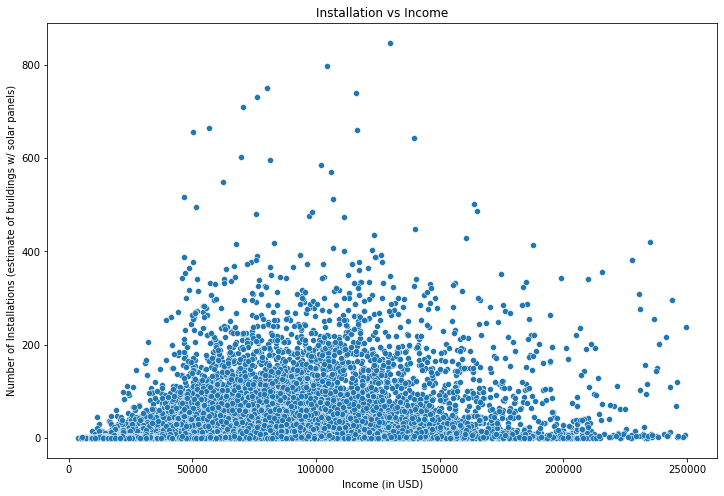

In [32]:
''' Combines dataframes containing census data and solar panel data into one dataframe to generate scatterplot'''
census2017_income_df['region_name'] = census2017_income_df['TractId']
census2017_income_df.index = census2017_income_df['region_name'] # sorts dataframe by tractID/region_name

geo_df.sort_values('region_name')
geo_df.index = geo_df['region_name']
geo_new_df = geo_df.drop(columns = ['region_name']) # drops repeat column

combined_df = pd.concat([geo_new_df, census2017_income_df], axis=1, join='inner') # combines dataframes

x = combined_df['Income']
y = combined_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)  # generates seaborn scatterplot
plt.title('Installation vs Income')
plt.xlabel('Income (in USD)')
plt.ylabel('Number of Installations (estimate of buildings w/ solar panels)')


/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations')

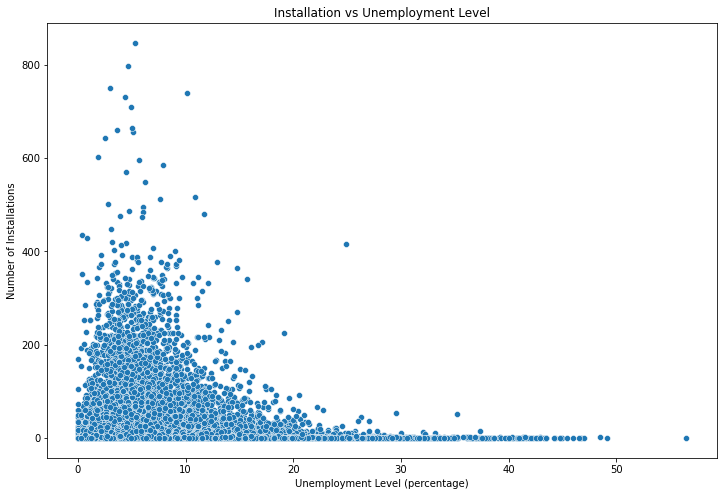

In [34]:
''' Generates scatterplot depicting the relationship between existing installation count and unemployment level 
with each point representing a geographic census tract '''
x = combined_df['Unemployment']
y = combined_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)
plt.title('Installation vs Unemployment Level')
plt.xlabel('Unemployment Level (percentage)')
plt.ylabel('Number of Installations')

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations')

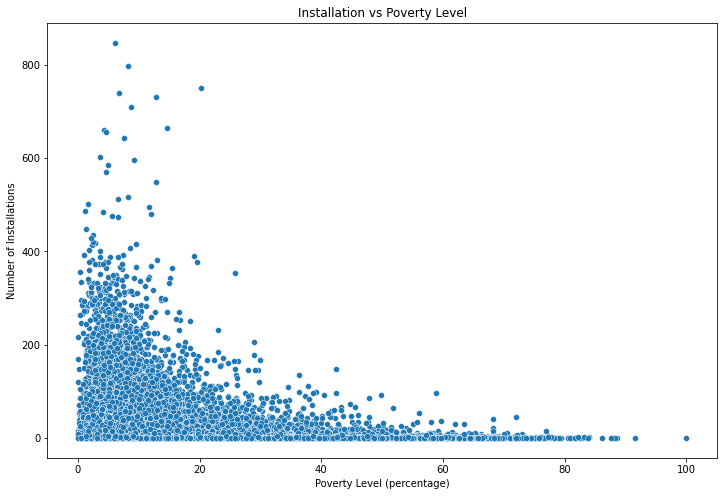

In [35]:
''' Generates scatterplot depicting the relationship between existing installation count and poverty level 
with each point representing a geographic census tract '''
x = combined_df['Poverty']
y = combined_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)
plt.title('Installation vs Poverty Level')
plt.xlabel('Poverty Level (percentage)')
plt.ylabel('Number of Installations')

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations (estimate of buildings w/ solar panels)')

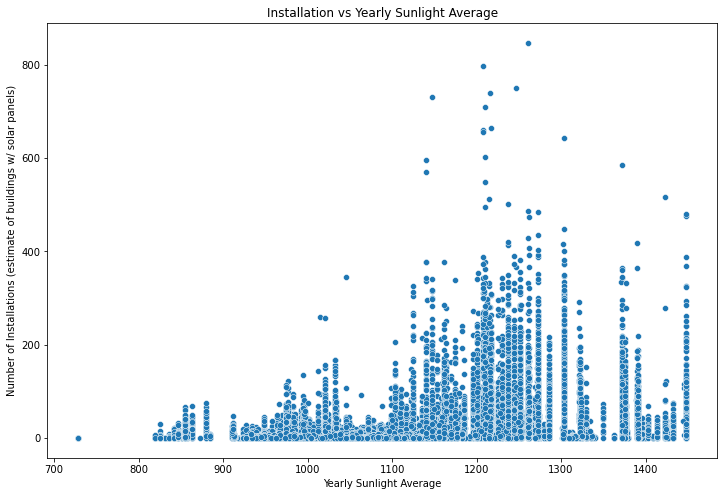

In [36]:
''' Generates scatterplot depicting the relationship between existing installation count and yearly sunlight average 
with each point representing a geographic census tract '''
sunroof_avg_df.index = sunroof_avg_df['region_name']  # changes index to region name
sunroof_avg_df = sunroof_avg_df.drop(columns = ['region_name'])

# combines sunroof dataframe with geographic dataframe
combined_sun_census_df = pd.concat([sunroof_avg_df, geo_new_df], axis=1, join='inner')

x = combined_sun_census_df['yearly_sunlight_kwh_kw_threshold_avg']
y = combined_sun_census_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)
plt.title('Installation vs Yearly Sunlight Average')
plt.xlabel('Yearly Sunlight Average')
plt.ylabel('Number of Installations (estimate of buildings w/ solar panels)')


<center> <h2> Conclusions </h2> </center>

**Research Question #1**: How does solar panel usage and solar panel/energy efficiency vary by geographic location?

To better understand how solar panel usage and solar energy efficiency varies by geographic location, we utilized the geopandas library to visually depict the relationships between variables such as solar panel installation and sunlight on a map of the United States. Generally, we found a strong positive correlation between average yearly average sunlight and the number of solar panel installations; this meant that areas that tend to receive more sunlight such as California and Florida also had many more installations. However, from the visualizations, it is evident that some locations do not follow this trend. For instance, although there are high levels of sunlight in Southern states such as Texas and Louisiana, the solar panel installation to sunlight proportion is lesser (meaning there is more sunlight but not as many installations as expected) than areas such as the Northeast and California. Since solar panel deployment is costly, this may be the result of lower income levels, unemployment levels and high poverty levels in Southern states. Moreover, we found that yearly average sunlight and carbon offset are strongly correlated, meaning that areas with high levels of sunlight and a greater number of installations also had greater carbon offset. This result can be explained by how generally, high levels of sunlight increases the likelihood of solar panel installations, which results in more solar energy being utilized. Therefore, less nonrenewable energy is used, keeping more carbon out of the environment, and carbon offset is increased.

**Research Question #2**: In what ways are solar panel deployment correlated with socioeconomic measures (income, poverty, unemployment, etc.)?

Overall, from our scatterplots, we found that there was slight positive correlation between income level and solar panel installation, meaning those from areas with high income levels tend to have more installations. We also found a strong negative correlation between poverty level and solar panel installation as well as between unemployment level and installation; such findings can be explained by the high costs of solar panel deployment. Generally, those from areas associated with lower income levels, higher poverty levels and higher unemployment levels are less likely to utilize, or have access to, solar panels. Installation count may drop significantly in regions with very low poverty or unemployment (such as the midwest), which may be explained by the lower levels of sunlight and fewer solar panel installations. This demonstrates that variables including sunlight levels, income, unemployment, and poverty are all contributing factors in whether solar panels are deployed.

# check this
In order to address our second research question, we first wanted to determine if correlations were present between solar panel deployment, and socioeconomic measures such as income, poverty, and unemployment. Based on several of our visualizations (most notably, the bar graph of # Unemployed vs. State, and the scatterplot of Poverty vs. Unemployment [US]), we discovered that there is a positive correlation between poverty and unemployment, with the highest poverty and unemployment levels for Puerto Rico, and the lowest documented levels for Midwestern regions. Furthermore, states with high sunlight and high capabilities of installations have high unemployment.

To take these findings one step further, we wanted to uncover how these states - for instance, Puerto Rico and Midwestern states - have gone about solar panel deployment, if at all, and the underlying reasons for their transition to solar. Based on our research, we discovered that Puerto Rico transitioned to solar energy after Hurricane Maria, which natives viewed as a long-term solution to the unreliability of electric power sources (https://www.npr.org/2019/07/05/738164642/puerto-rico-harnesses-the-power-of-the-sun-for-a-renewable-energy-future). Despite the high costs of this transition to solar, in the long-run, it will save natives time, effort, and money, and prevent "another extended islandwide power failure". With regards to Midwestern states, the shift toward solar energy was initiated (2008) by a desire to mitigate climate change, however was most influenced by policy - deemed "clean energy mandates" (https://www.eenews.net/stories/1060087435). 

<center> <h3> Policy Suggestions </h3> </center>
<b> City Government: </b>
On the local, city government level, we suggest deploying solar panels to power municipal buildings, including schools, libraries, etc. Furthermore, local governments can use net metering to provide electricity bill credits for every unit of electricity generated by solar panels. This would provide more incentive for households to take up the cost of installing solar panels.

<b> State Government: </b>
For state government policies, we believe that allocating more funding towards solar and renewable energy would be beneficial. This additional funding could be used towards solar panel tax credis and rebates that would encourage more homeowners to consider using solar energy. Furthermore, expanding on the existing Renewable Portfolio Standards (RPS) can encourage wider adoption of solar energy without homeowners having to actively install panels. The RPS requires utilities providers to produce a certain proportion of renewable energy.

<b> Federal Government: </b>
In terms of national government policies and initiatives, we would suggest a progress tax credit system in which lower-income families would receive proportionally more tax rebates in comparison to wealthier, higher-income families. This would encourage more lower-income families to install solar panels, which could help reduce their electricity bills while also diminishing that gap in installments between different socioeconomic levels. Furthermore, by allocating more funding in general to renewable energy, and also targeting solar deployment in areas with more sunlight could significantly increase our carbon offset as a country. This is crucial given our current contribution to global climate change.

<center> <h3> Limitations and Next Steps </h3> </center>


**Author Contributions:**

Catherine Quaintance - 

Hannah Reyes - 

Marco Tortolani - CSV/SHP import and cleaning, bar graph visualizations, code comment and markdown

Emily Wang - Analysis & results, conclusion, commenting on code, scatterplots depicting relationships between variables

Xinyu Wu - Background and significance, multi and single layer geovisualizations, policy suggestions